Propagation of spike along the axon
===================================

This code performs basic simulation showing the propagation of action potential along axons for both unmyelinated and myelinated (saltatory conduction) fibers.

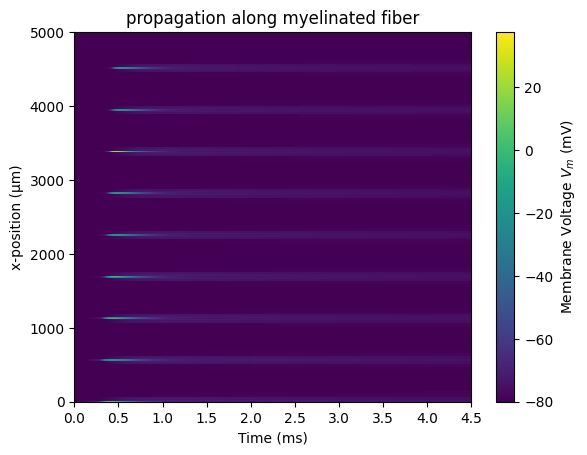

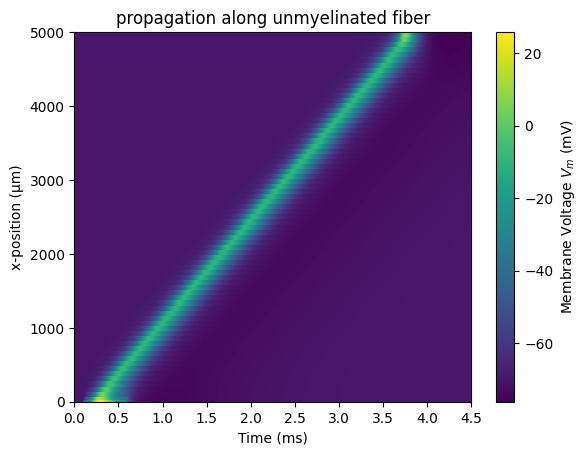

In [ ]:
import nrv
import matplotlib.pyplot as plt

if __name__ == '__main__':

    # axon def
    y = 0						# axon y position, in [um]
    z = 0						# axon z position, in [um]
    d = 6						# axon diameter, in [um]
    L = 5000					# axon length, along x axis, in [um]
    axon1 = nrv.myelinated(y,z,d,L,rec='all')

    t_start = 0.1
    duration = 0.5
    amplitude = 0.35

    amplitude = 0.195
    axon2 = nrv.unmyelinated(y,z,d,L,dt=0.001,Nrec=2000)
    axon1.insert_I_Clamp(0, t_start, duration, amplitude)

    amplitude = 10
    axon2.insert_I_Clamp(0, t_start, duration, amplitude)


    results = axon1.simulate(t_sim=4.5)
    del axon1

    fig, ax = plt.subplots(1)
    cbar = results.colormap_plot(ax, "V_mem")
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('x-position (µm)')
    ax.set_title('propagation along myelinated fiber')
    cbar.set_label(r'Membrane Voltage $V_m$ (mV)')

    results = axon2.simulate(t_sim=4.5)
    #nrv.rasterize(results,'V_mem')
    del axon2

    fig, ax = plt.subplots(1)
    cbar = results.colormap_plot(ax, "V_mem")
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('x-position (µm)')
    ax.set_title('propagation along unmyelinated fiber')
    cbar.set_label(r'Membrane Voltage $V_m$ (mV)')
    #plt.show()